In [37]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from numpy.random import randn
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
% matplotlib inline

In [12]:
file = '/home/phil/python/titanic/data/train.csv'

In [14]:
titanic_data = pd.read_csv(file)

In [22]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [21]:
titanic_data['PassengerId'].iloc[2]

3

In [67]:
class_data = pd.crosstab(titanic_data.Pclass,titanic_data.Survived)

In [68]:
class_data.columns

Int64Index([0, 1], dtype='int64', name='Survived')

In [69]:
class_data.columns = ['Perished', 'Survived']

In [70]:
class_data['Total'] = class_data['Perished'] + class_data['Survived']

In [71]:
class_data

,Perished,Survived,Total
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491


In [72]:
class_data['Survival_Rate'] = class_data['Survived']/class_data['Total']

In [73]:
class_data

,Perished,Survived,Total,Survival_Rate
Pclass,,,,
1,80,136,216,0.629630
2,97,87,184,0.472826
3,372,119,491,0.242363


In [47]:
class_count = class_data[['Perished','Survived']]

In [101]:
cc = class_count.stack()
cc

Pclass          
1       Perished     80
        Survived    136
2       Perished     97
        Survived     87
3       Perished    372
        Survived    119
dtype: int64

In [102]:
cc.index

MultiIndex(levels=[[1, 2, 3], ['Perished', 'Survived']],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]],
           names=['Pclass', None])

In [81]:
class_rate = DataFrame(class_data['Survival_Rate'])

In [87]:
class_rate.columns

Index(['Survival_Rate'], dtype='object')

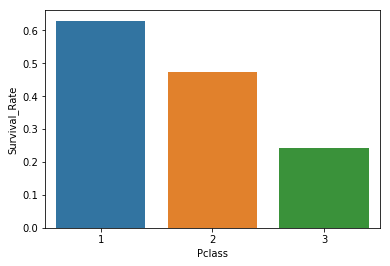

In [88]:
sns.barplot(x=class_rate.index, y=class_rate.Survival_Rate)

In [122]:
class_rate

,Survival_Rate
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [124]:
cc.values

array([ 80, 136,  97,  87, 372, 119])

In [125]:
cc.index

MultiIndex(levels=[[1, 2, 3], ['Perished', 'Survived']],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]],
           names=['Pclass', None])

In [127]:
cc

Pclass          
1       Perished     80
        Survived    136
2       Perished     97
        Survived     87
3       Perished    372
        Survived    119
dtype: int64